1. Project overview
2. Problem framing
3. Goal 
4. Import the required libraries and read the dataset
5. Perform descriptive analysis
6. Data pre-processing  -   
    6.1. Setting date as Index  
    6.2. Setting frequency as month
7. Exploratory Data Analysis (EDA) 
8. Train-test Split  
    8.1. Perform train-test split
9. Modelling      
9.1. Fit and train the Model    
10. Make predictions on the test data   
10.1. Plot the results


-Project overview
- This is a Multivariate time series forecasting project from end-to-end, from defining the problem to training a final model and making predictions. This project is not exhaustive, but shows how you can get good results quickly by working through a time series forecasting problem systematically. The steps of this project will include:

-Problem framing
* The problem is to predict annual anthrax outbreaks in Ethiopia. The dataset provides the annual anthrax outbreak in Ethiopia from 2014 to 2018, or 5 years of data. The values in data indicates the total number of cases reported during outbreaks in all adminstrative region of Ethiopia, and there are 59 observations. The dataset is credited to Ministry of Livestock and Fisheries of Ethiopia, 2020. Below is a sample of the first few rows of the dataset.

-Goal of the Project
* To build disease progression model and to forecast the annual new cases of *Bacillus anthracis* in Livestocks by using Multiple time series models. 

-Libraries and Data importation

In [1]:
%matplotlib inline
import warnings
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', context='notebook', color_codes=True)

In [2]:
import os,sys
module_path = os.path.abspath(os.path.join("/home/miki/Desktop/Deployment/time-series/src"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from feat import *

In [4]:
DATAPATH = "/home/miki/Desktop/Deployment/time-series/data/raw/time.csv"
df = data_load(DATAPATH)

In [5]:
df

,date,case,death
0,2014-01-31,132,74
1,2014-02-28,175,67
2,2014-03-31,240,71
3,2014-04-30,314,165
4,2014-05-31,299,165
5,2014-06-30,156,89
6,2014-07-31,253,81
7,2014-08-31,119,41
8,2014-09-30,188,43
9,2014-10-31,267,43


In [6]:
summary= summary_statistics(df['case'])
sums = summary_statistics(df['death'])

In [7]:
summary
## slight deviation of the data from the mean indicated and hence not normally distributed 
## median less than the mean indicates the skeweness of the data toward right
## the minimum of the case is 0 and the maximum number of ifection reported is 210
## the difference between the 75% IQR and the maximum case indicates that there are a potential 
## outliers in data

,Mean,Standard Deviation,Median,Variance,Minimum,Maximum
Variable,,,,,,
case,117.866667,108.738443,82.5,11824.048889,3,442


In [8]:
sums

,Mean,Standard Deviation,Median,Variance,Minimum,Maximum
Variable,,,,,,
death,32.983333,37.916791,19.0,1437.683056,0,165


In [9]:
df = check_index(df)

The duplications are found


In [10]:
df

,date,case,death
0,2014-01-31,132,74
1,2014-02-28,175,67
2,2014-03-31,240,71
3,2014-04-30,314,165
4,2014-05-31,299,165
5,2014-06-30,156,89
6,2014-07-31,253,81
7,2014-08-31,119,41
8,2014-09-30,188,43
9,2014-10-31,267,43


In [11]:
df.set_index('date',drop=True, inplace=True)
df.index.freq = 'M'

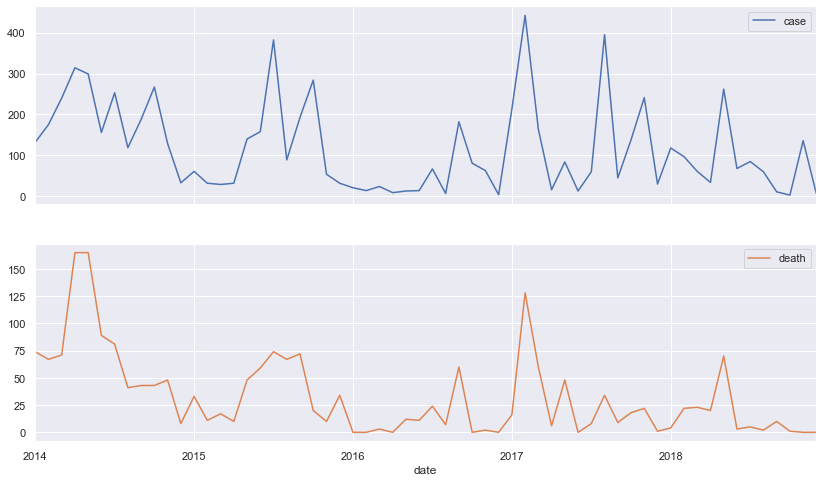

In [12]:
df.plot(subplots=True, figsize=(14,8));

In [13]:
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import probplot, moment

In [14]:
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    x.plot(ax=axes[0][0])
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

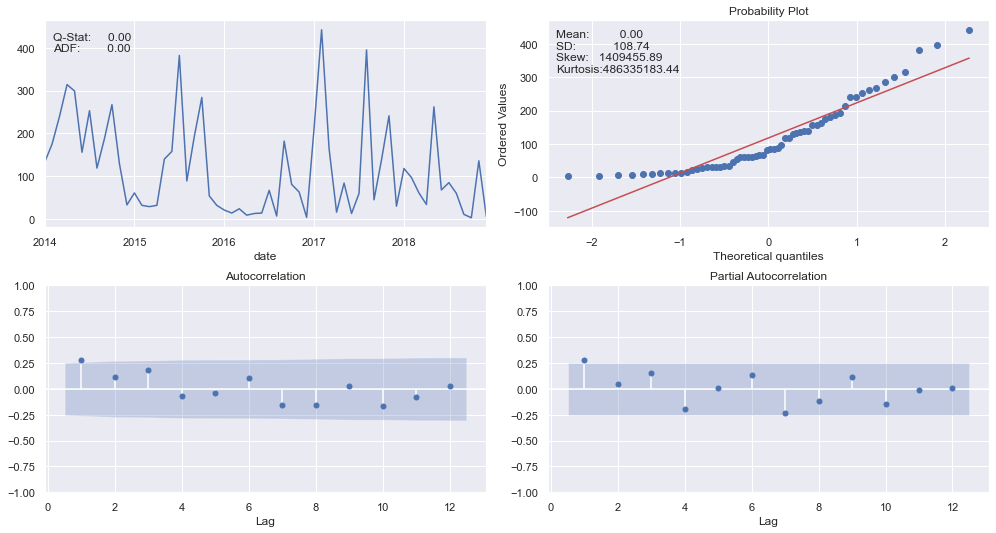

In [15]:
plot_correlogram(df['case'], lags=12)

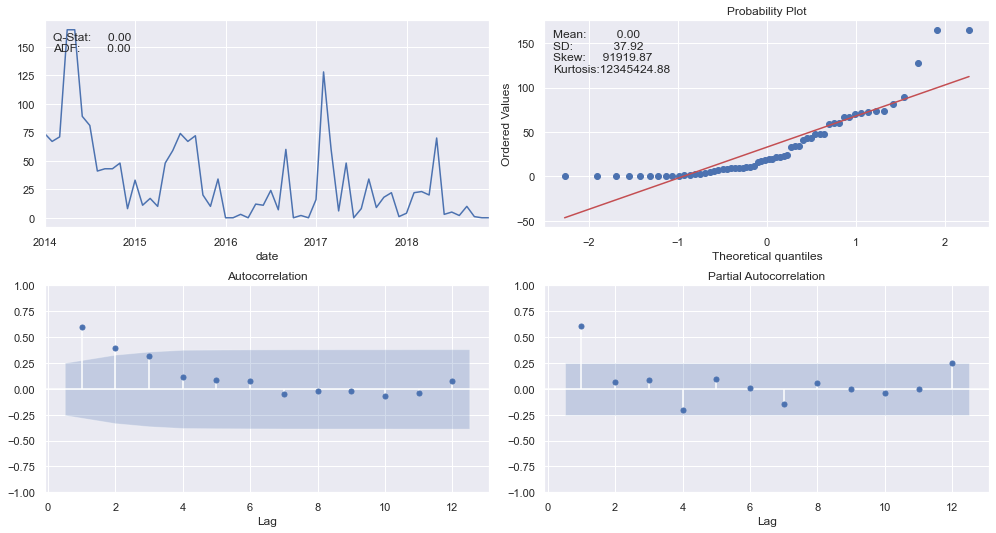

In [16]:
plot_correlogram(df['death'], lags=12)

In [17]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df.iteritems():
    adfuller_test(column, name=column.name)

 case : P-Value = 0.0 => Stationary. 
 death : P-Value = 0.003 => Stationary. 


In [18]:
train = df.iloc[:48]

In [19]:
train

,case,death
date,,
2014-01-31,132,74
2014-02-28,175,67
2014-03-31,240,71
2014-04-30,314,165
2014-05-31,299,165
2014-06-30,156,89
2014-07-31,253,81
2014-08-31,119,41
2014-09-30,188,43


In [20]:
from statsmodels.tsa.api import VAR, VARMAX

In [21]:
df = df.astype('float32')

In [22]:
model = VARMAX(df.iloc[:48], order=(1,1), trend='c').fit(maxiter=1000)

/home/miki/Desktop/Deployment/time-series/multime/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06678D+01    |proj g|=  2.20261D-02

At iterate    5    f=  1.06671D+01    |proj g|=  1.21291D-02

At iterate   10    f=  1.06665D+01    |proj g|=  1.59967D-03

At iterate   15    f=  1.06663D+01    |proj g|=  3.84618D-02

At iterate   20    f=  1.06660D+01    |proj g|=  2.36447D-03

At iterate   25    f=  1.06660D+01    |proj g|=  4.59413D-03

At iterate   30    f=  1.06659D+01    |proj g|=  8.96368D-03

At iterate   35    f=  1.06659D+01    |proj g|=  2.60425D-03

At iterate   40    f=  1.06659D+01    |proj g|=  8.56966D-04

At iterate   45    f=  1.06659D+01    |proj g|=  2.55245D-03

At iterate   50    f=  1.06657D+01    |proj g|=  3.64015D-03

At iterate   55    f=  1.06650D+01    |proj g|=  1.40852D-02

At iterate   60    f=  1.06644D+01    |proj g|=  3.63549D-03

At iterate   65    f=  1.0

In [23]:
print(model.summary())

                           Statespace Model Results                           
Dep. Variable:      ['case', 'death']   No. Observations:                   48
Model:                     VARMA(1,1)   Log Likelihood                -509.183
                          + intercept   AIC                           1044.365
Date:                Mon, 18 Jul 2022   BIC                           1068.691
Time:                        21:55:38   HQIC                          1053.558
Sample:                    01-31-2014                                         
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.03   Jarque-Bera (JB):          11.82, 4.82
Prob(Q):                        0.96, 0.87   Prob(JB):                   0.00, 0.09
Heteroskedasticity (H):         3.22, 0.98   Skew:                       1.12, 0.51
Prob(H) (two-sided):            0.03,

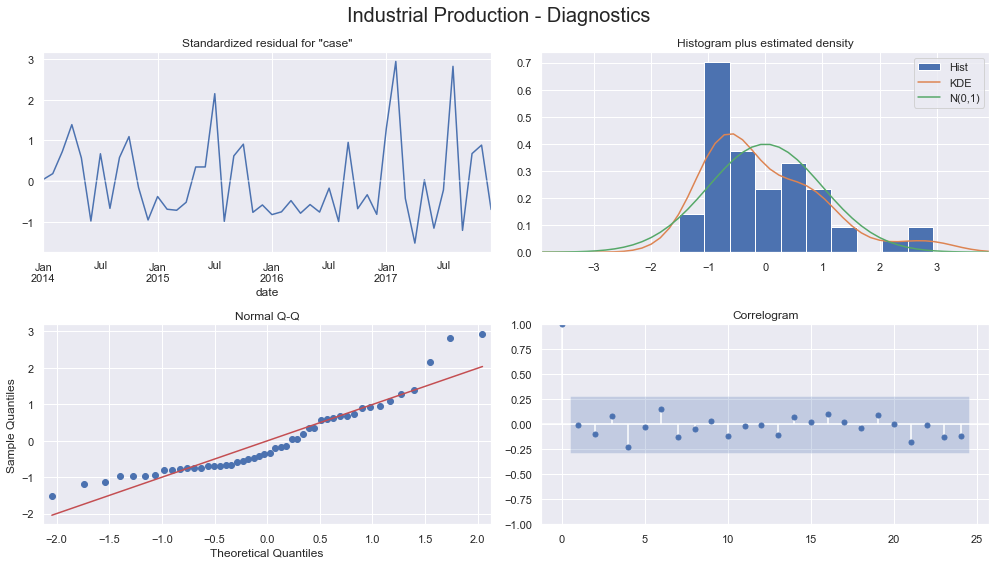

In [24]:
model.plot_diagnostics(variable=0, figsize=(14,8), lags=24)
plt.gcf().suptitle('Industrial Production - Diagnostics', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=.9);

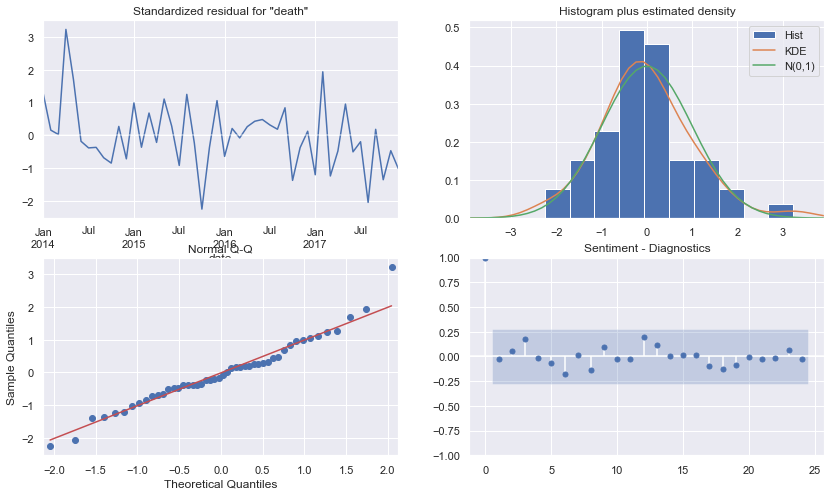

In [25]:
model.plot_diagnostics(variable=1, figsize=(14,8), lags=24)
plt.title('Sentiment - Diagnostics');

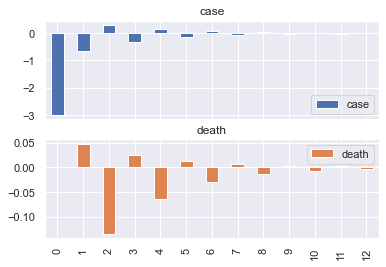

In [26]:
median_change = df.diff().quantile(.5).tolist()
model.impulse_responses(steps=12, impulse=median_change).plot.bar(subplots=True);

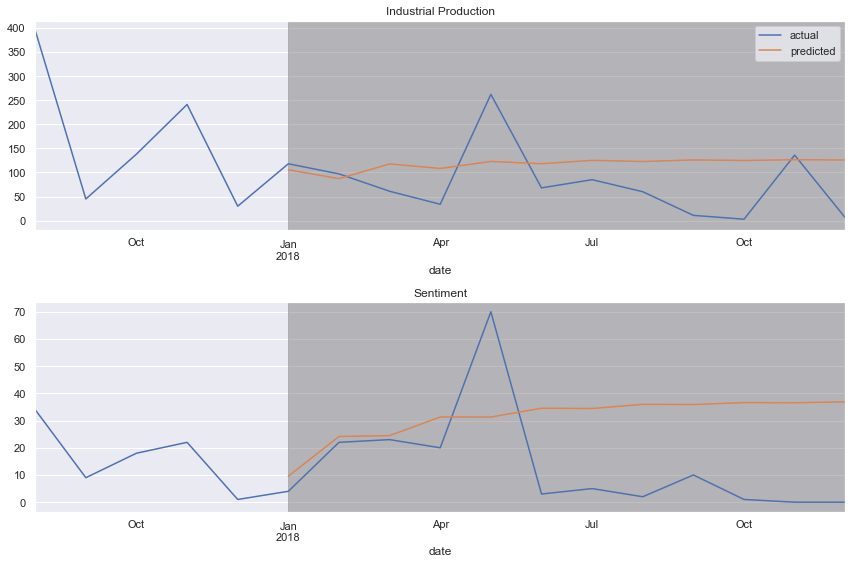

In [27]:
import matplotlib.transforms as mtransforms

start = 43
preds = model.predict(start=48, end=len(df)-1)
preds.index = df.index[48:]

fig, axes = plt.subplots(nrows=2, figsize=(12, 8))

df.case.iloc[start:].plot(ax=axes[0], label='actual', title='Industrial Production')
preds.case.plot(label='predicted', ax=axes[0])
trans = mtransforms.blended_transform_factory(axes[0].transData, axes[0].transAxes)
axes[0].legend()
axes[0].fill_between(x=df.index[48:], y1=0, y2=1, transform=trans, color='grey', alpha=.5)

trans = mtransforms.blended_transform_factory(axes[0].transData, axes[1].transAxes)
df.death.iloc[start:].plot(ax=axes[1], label='actual', title='Sentiment')
preds.death.plot(label='predicted', ax=axes[1])
axes[1].fill_between(x=df.index[48:], y1=0, y2=1, transform=trans, color='grey', alpha=.5)
fig.tight_layout();

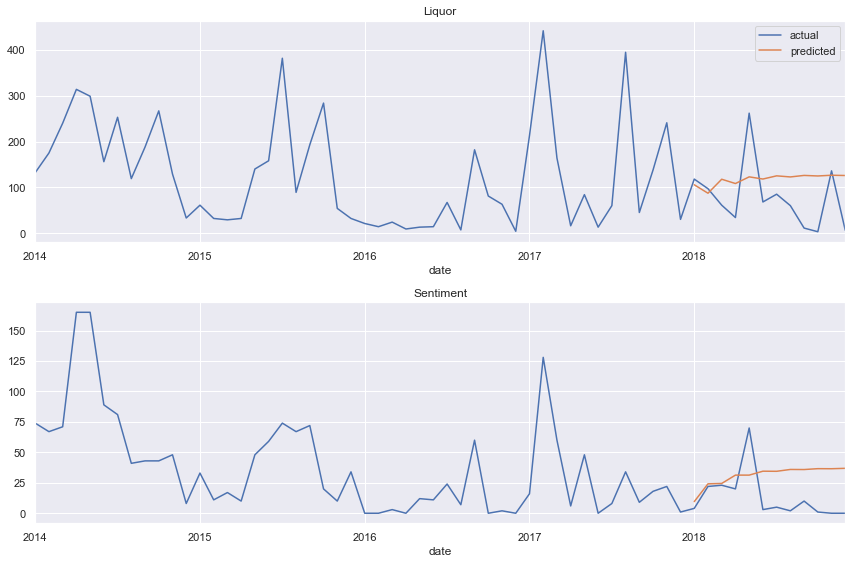

In [28]:
forecast = model.forecast(steps=24)

fig, axes = plt.subplots(nrows=2, figsize=(12, 8))

df.case.plot(ax=axes[0], label='actual', title='Liquor')
preds.case.plot(label='predicted', ax=axes[0])
axes[0].legend()

df.death.plot(ax=axes[1], label='actual', title='Sentiment')
preds.death.plot(label='predicted', ax=axes[1])
axes[1]
fig.tight_layout();